<a href="https://colab.research.google.com/github/Kaleriaa/PythonNeu/blob/main/predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Обработка данных

In [ ]:
import pandas as pd

In [ ]:
usd_cost = pd.read_excel("/content/RC_F01_12_2017_T01_12_2020.xlsx")

In [ ]:
oil_cost = pd.read_excel("/content/RBRTEd.xls", sheet_name=1, names=['date', 'oil_price'], skiprows=2)

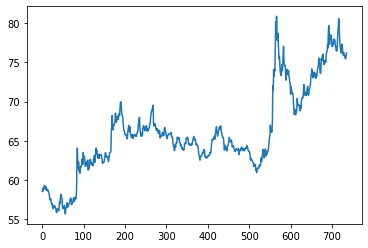

In [ ]:
usd_cost.curs.plot()

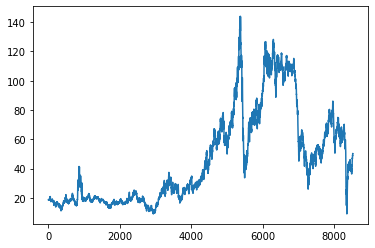

In [ ]:
oil_cost.oil_price.plot()

In [ ]:
oil_cost

,date,oil_price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
8519,2020-12-08,48.84
8520,2020-12-09,48.81
8521,2020-12-10,50.33
8522,2020-12-11,50.01


In [ ]:
df = usd_cost.set_index('data').join(oil_cost.set_index('date'))

In [ ]:
df.drop(['nominal','cdx'], inplace=True, axis=1)

In [ ]:
df.fillna(method= 'ffill', inplace=True)

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df

,data,curs,oil_price
0,2017-12-01,58.5814,64.57
1,2017-12-02,58.5182,64.57
2,2017-12-05,58.9911,63.45
3,2017-12-06,58.6924,62.25
4,2017-12-07,58.9281,62.37
...,...,...,...
731,2020-11-25,75.8146,47.30
732,2020-11-26,75.4727,46.32
733,2020-11-27,75.4518,46.88
734,2020-11-28,75.8599,46.88


In [ ]:
df['year']= df['data'].dt.year
df['month']= df['data'].dt.month
df['weekday']= df['data'].dt.dayofweek

In [ ]:
past_day = 7

In [ ]:
for day in range(past_day):
  n = day+1
  df[f"prev_day{n}"] = df['curs'].shift(n)
  df[f'prev_oil{n}'] = df['oil_price'].shift(n)
  df[f'multy_rus{n}']= df[f"prev_day{n}"]* df[f"prev_oil{n}"]

In [ ]:
df['usd_median'] = df['curs'].shift(1).rolling(window = 7).median()
df['oil_median'] = df['oil_price'].shift(1).rolling(window=7).median()

In [ ]:
final_df = pd.get_dummies(df, columns=['year','month','weekday']).drop(['data','oil_price'], axis=1)[7:]

In [ ]:
X = final_df.drop('curs', axis=1)
y = final_df.curs

In [ ]:
X_train = X[:700]
y_train = y[:700]

In [ ]:
X_test = X[700:]
y_test = y[700:]

In [ ]:
X_test

,prev_day1,prev_oil1,multy_rus1,prev_day2,prev_oil2,multy_rus2,prev_day3,prev_oil3,multy_rus3,prev_day4,prev_oil4,multy_rus4,prev_day5,prev_oil5,multy_rus5,prev_day6,prev_oil6,multy_rus6,prev_day7,prev_oil7,multy_rus7,usd_median,oil_median,year_2017,year_2018,year_2019,year_2020,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
707,77.9241,41.62,3243.201042,77.9644,41.34,3223.048296,77.9461,41.34,3222.291774,77.2759,41.61,3215.450199,77.2855,41.81,3231.306755,77.0239,41.34,3184.168026,77.0284,41.63,3206.692292,77.2855,41.61,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
708,77.7780,40.09,3118.120020,77.9241,41.62,3243.201042,77.9644,41.34,3223.048296,77.9461,41.34,3222.291774,77.2759,41.61,3215.450199,77.2855,41.81,3231.306755,77.0239,41.34,3184.168026,77.7780,41.34,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
709,77.0322,41.28,3179.889216,77.7780,40.09,3118.120020,77.9241,41.62,3243.201042,77.9644,41.34,3223.048296,77.9461,41.34,3222.291774,77.2759,41.61,3215.450199,77.2855,41.81,3231.306755,77.7780,41.34,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
710,77.0809,40.71,3137.963439,77.0322,41.28,3179.889216,77.7780,40.09,3118.120020,77.9241,41.62,3243.201042,77.9644,41.34,3223.048296,77.9461,41.34,3222.291774,77.2759,41.61,3215.450199,77.7780,41.34,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
711,76.4667,40.71,3112.959357,77.0809,40.71,3137.963439,77.0322,41.28,3179.889216,77.7780,40.09,3118.120020,77.9241,41.62,3243.201042,77.9644,41.34,3223.048296,77.9461,41.34,3222.291774,77.7780,41.28,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
712,76.4443,39.72,3036.367596,76.4667,40.71,3112.959357,77.0809,40.71,3137.963439,77.0322,41.28,3179.889216,77.7780,40.09,3118.120020,77.9241,41.62,3243.201042,77.9644,41.34,3223.048296,77.0809,40.71,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
713,76.4556,37.86,2894.609016,76.4443,39.72,3036.367596,76.4667,40.71,3112.959357,77.0809,40.71,3137.963439,77.0322,41.28,3179.889216,77.7780,40.09,3118.120020,77.9241,41.62,3243.201042,77.0322,40.71,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
714,77.5520,36.56,2835.301120,76.4556,37.86,2894.609016,76.4443,39.72,3036.367596,76.4667,40.71,3112.959357,77.0809,40.71,3137.963439,77.0322,41.28,3179.889216,77.7780,40.09,3118.120020,77.0322,40.09,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
715,78.8699,36.33,2865.343467,77.5520,36.56,2835.301120,76.4556,37.86,2894.609016,76.4443,39.72,3036.367596,76.4667,40.71,3112.959357,77.0809,40.71,3137.963439,77.0322,41.28,3179.889216,77.0322,39.72,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
716,79.3323,36.33,2882.142459,78.8699,36.33,2865.343467,77.5520,36.56,2835.301120,76.4556,37.86,2894.609016,76.4443,39.72,3036.367596,76.4667,40.71,3112.959357,77.0809,40.71,3137.963439,77.0809,37.86,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


# Разные модели, настроенные вручную (нерпавильная ошибка)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
prediction = LinReg.predict(X_test)

In [ ]:
prediction

array([77.72827425, 77.61924679, 77.13901552, 76.75556502, 76.58885999,
       76.34064587, 76.53485381, 77.69516182, 78.80483591, 79.22523327,
       80.17881048, 79.55697409, 78.02001438, 77.03715812, 76.47062863,
       75.63533019, 75.96660485, 76.80409826, 77.24970214, 76.6697375 ,
       76.00934437, 75.73879404, 75.93173283, 75.79010077, 75.53284697,
       75.27096182, 75.34905638, 75.32182296, 75.68014276])

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
plot(prediction, 'LinearRegression')

NameError: ignored

In [ ]:
print("MAE = ", mean_absolute_error(y_test, prediction))

MAE =  0.4459538557444445


In [ ]:
pd.DataFrame(data = LinReg.coef_ , index = X.columns, columns=['value']).sort_values(by='value', ascending=False)

In [ ]:
from sklearn.ensemble import RandomForestRegressor 

In [ ]:
forest = RandomForestRegressor(random_state=15, n_estimators= 250, min_samples_split=7, max_depth= 200)
forest.fit(X_train, y_train)
f_predict = forest.predict(X_test)
mae = mean_absolute_error(y_test, f_predict)
print ("mae= ", mae)
f_predict

In [ ]:
plot(f_predict, 'RandomForestRegressor')

NameError: ignored

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes = (200, 300, 200), max_iter = 1100, random_state= 11)
mlp.fit(X_train, y_train)
mlp_pr = mlp.predict(X_test)
mlp_mae = mean_absolute_error(y_test, mlp_pr)
print ("mae", mlp_mae)

mae 1.081768332145137


# Модели с автонастройкой и выбором лучшей с помощью GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

RandomForestRegression model

In [ ]:
rf =  RandomForestRegressor(random_state = 15, n_jobs=2)

param_rf= {
     "n_estimators" : [ 300, 700, 1200],
    "max_depth": [3, 5, 9],
    "min_samples_split" : [3, 6, 8],
}
gs = GridSearchCV(rf, param_rf, scoring='neg_mean_absolute_error', cv=3, n_jobs=-1)

In [ ]:
gs.fit (X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=2,
                                             oob_score=False, random_state=15,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1

In [ ]:
gs.best_score_

-1.7866956193682213

In [ ]:
gs.best_params_

{'max_depth': 9, 'min_samples_split': 8, 'n_estimators': 300}

In [ ]:
gs.best_estimator_


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=2, oob_score=False,
                      random_state=15, verbose=0, warm_start=False)

In [ ]:
rf_predict= gs.best_estimator_.predict(X_test)

In [ ]:
import matplotlib.pyplot as pl
import numpy as np
def plot(prediction, model):
  plt.title("Прогноз и реальные значения "+ model)
  plt.plot(prediction, label="prediction")
  plt.plot(np.array(y_test), label="real")
  plt.xlabel('day')
  plt.ylabel('curs of dollar')
  plt.legend()
  plt.show()

In [ ]:
plot(rf_predict, 'RandomForestRegressor')

NameError: ignored

MLPRegression model

In [ ]:
mlp_best = MLPRegressor(random_state=14)

param_grid = {
    "hidden_layer_sizes": [300, 700, 500],
    "max_iter" : [600, 1000, 1500],
}
gs_mlp = GridSearchCV(mlp_best, param_grid, scoring='neg_mean_absolute_error', cv=3, n_jobs=-1)

In [ ]:
gs_mlp.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
gs_mlp.best_score_

In [ ]:
gs_mlp.best_params_

In [ ]:
gs_mlp.best_estimator_

In [ ]:
mlp_predict = gs_mlp.best_estimator_.predict(X_test)

In [ ]:
plot(mlp_predict, 'MLPRegression model')

GradientBoostingRegressor model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
grd = GradientBoostingRegressor(random_state=13)

param_grd = {
    "n_estimators": [200, 400, 700],
    "max_depth" : [4, 6, 9],
    "min_samples_split": [4, 9],
}
gs_grd = GridSearchCV(grd, param_grid=param_grd, scoring='neg_mean_absolute_error', cv=3, n_jobs=-1)

In [ ]:
gs_grd.fit(X_train, y_train)

In [ ]:
gs_grd.best_score_

In [ ]:
gs_grd.best_params_

In [ ]:
gs_grd.best_estimator_

In [ ]:
predict_grd = gs_grd.best_estimator_.predict(X_test)

In [ ]:
plot(predict_grd, 'GradientBoostingRegressor')

AdaBoostRegressor model

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
ada = AdaBoostRegressor(random_state=46)

ada_param = {
    "n_estimators" : [60, 75, 90],
    "loss": ['linear','square', 'exponential'],
}
gs_ada = GridSearchCV(ada, ada_param, scoring='neg_mean_absolute_error', cv=3, n_jobs=-1)

In [ ]:
gs_ada.fit(X_train, y_train)

In [ ]:
gs_ada.best_score_


In [ ]:
gs_ada.best_params_

In [ ]:
ada_predict = gs_ada.predict(X_test)

In [ ]:
plot(ada_predict, 'AdaBoostRegressor')

# Сравнение ошибок разных моделей

In [ ]:
res = pd.DataFrame([['RandomForestRegression', gs.best_score_],
                    ['MLPRegression', gs_mlp.best_score_],
                    ['GradientBoostingRegressor',gs_grd.best_score_],
                    ['AdaBoostRegressor', gs_ada.best_score_]],columns=['model','MAE'])

NameError: ignored

In [ ]:
res

NameError: ignored

In [ ]:
def final_plot(prediction):
  plt.title("Прогноз и реальные значения ")
  plt.plot(prediction, label="prediction")
  plt.plot(np.array(y_test), label="real")
  plt.xlabel('day')
  plt.ylabel('curs of dollar')
  plt.legend()
  plt.show()